--- 
**Desafio 1: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula <br>
Desafio 2: Ler a documentação do dummy e alterar o método <br>
Desafio 3: Buscar outra métrica para avaliar modelos de regressão <br>**

--- 

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np


dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# **Tabela Geral**

In [132]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [133]:
dados.shape

(127380, 136)

In [134]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **Variáveis e Funções**

In [135]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
alunos_menor_quatorze = dados.query("NU_IDADE <= 14")
renda_ordenada = dados["Q006"].unique().sort()
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis = 1)
provas.append("NU_NOTA_TOTAL")
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
correlacao = dados_sem_notas_zero[provas].corr()
dados_sp = dados_sem_notas_zero.query("CO_UF_RESIDENCIA == 35")
provas_sp = dados_sem_notas_zero.query("CO_UF_RESIDENCIA == 35")[provas]
correlacao_sp = provas_sp.corr()
media_mt = float("{:.2f}".format(dados_sem_notas_zero["NU_NOTA_MT"].mean()))
mediana_mt = dados_sem_notas_zero["NU_NOTA_MT"].median()
moda_mt = dados_sem_notas_zero["NU_NOTA_MT"].median()
media_lc = float("{:.2f}".format(dados_sem_notas_zero["NU_NOTA_LC"].mean()))
mediana_lc = dados_sem_notas_zero["NU_NOTA_LC"].median()
moda_lc = dados_sem_notas_zero["NU_NOTA_LC"].median()
provas_entrada = ["NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_CN", "NU_NOTA_REDACAO"]
provas_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[provas_saida]

# **Desafio 1 - Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula**

In [136]:
from sklearn.model_selection import train_test_split
SEED = 4321
x = notas_entrada
y = notas_saida
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, random_state = SEED)

In [137]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(x, y)

predicoes_linear_matematica = reg.predict(x_teste)

resultados_linear = pd.DataFrame()
resultados_linear["Real"] = y_teste
resultados_linear["Previsao"] = predicoes_linear_matematica
resultados_linear["Diferenca"] = (resultados_linear["Real"] - resultados_linear["Previsao"])
resultados_linear["Quadrado_Diferenca"] = (resultados_linear["Real"] - resultados_linear["Previsao"])**2

media_erro_linear = resultados_linear["Quadrado_Diferenca"].mean()**(1/2)

resultados_linear

,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,538.371436,-78.671436,6189.194870
104685,617.2,609.877817,7.322183,53.614369
91028,520.0,487.393978,32.606022,1063.152690
115802,703.8,569.442608,134.357392,18051.908736
93303,627.1,561.215224,65.884776,4340.803703
...,...,...,...,...
81393,688.6,602.621769,85.978231,7392.256210
40159,479.1,629.543771,-150.443771,22633.328273
64083,501.4,584.489560,-83.089560,6903.875047
84661,772.5,721.071871,51.428129,2644.852481


In [138]:
# Modelo da aula
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

predicoes_matematica = modelo.predict(x_teste)

resultados = pd.DataFrame()
resultados["Real"] = y_teste
resultados["Previsao"] = predicoes_matematica
resultados["Diferenca"] = (resultados["Real"] - resultados["Previsao"])
resultados["Quadrado_Diferenca"] = (resultados["Real"] - resultados["Previsao"])**2

media_erro_linearSVR = resultados["Quadrado_Diferenca"].mean()**(1/2)

resultados

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Real,Previsao,Diferenca,Quadrado_Diferenca
114991,459.7,564.486105,-104.786105,10980.127878
104685,617.2,628.305027,-11.105027,123.321625
91028,520.0,509.980986,10.019014,100.380650
115802,703.8,593.681144,110.118856,12126.162420
93303,627.1,579.784588,47.315412,2238.748252
...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380
40159,479.1,652.313922,-173.213922,30003.062777
64083,501.4,607.787172,-106.387172,11318.230438
84661,772.5,734.227663,38.272337,1464.771772


Text(0, 0.5, 'ERRO')

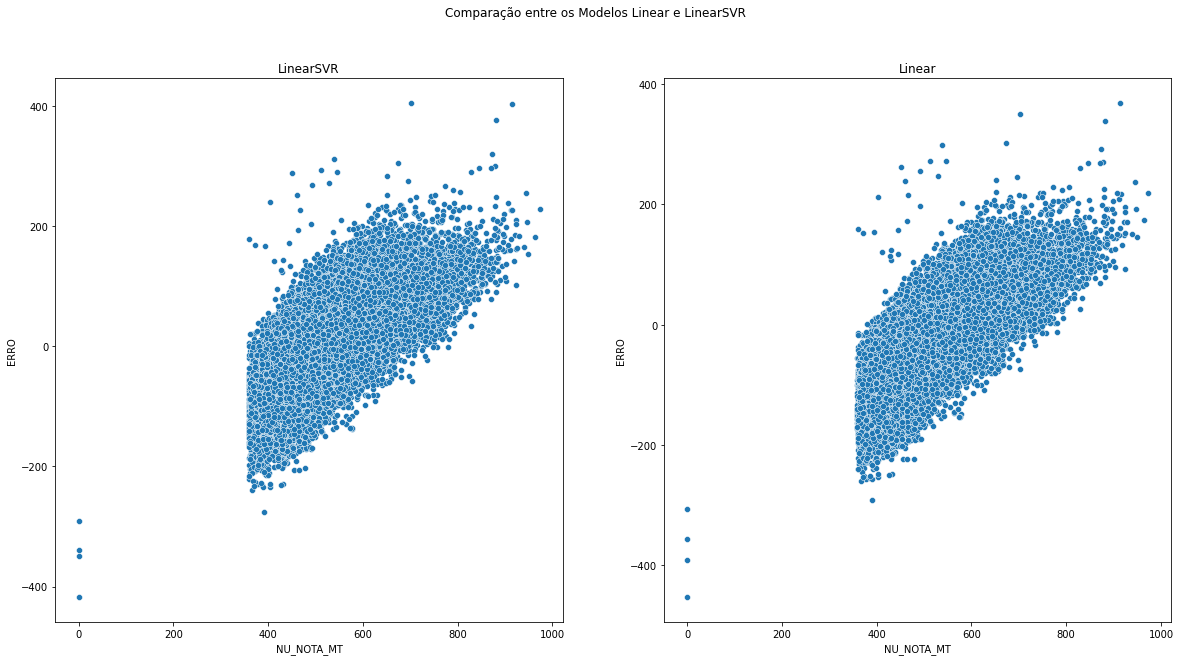

In [141]:
plt.figure(figsize=(20,10))
plt.suptitle("Comparação entre os Modelos Linear e LinearSVR")

plt.subplot(1, 2, 1)
sns.scatterplot(x = y_teste, y = y_teste - predicoes_linear_matematica)
plt.title("LinearSVR")
plt.ylabel("ERRO")

plt.subplot(1,2,2)
plt.title("Linear")
sns.scatterplot(x = y_teste, y = y_teste - predicoes_matematica)
plt.ylabel("ERRO")

In [ ]:
print(media_erro_linear)
print(media_erro_linearSVR)

77.20581368666936
81.26755383435341


# **Desafio 2: Ler a documentação do dummy e alterar o método**

In [146]:
# Dummy da aula
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
d_pred = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, d_pred)

12063.645588509502

In [150]:
modelo_dummy = DummyRegressor(strategy="median")
modelo_dummy.fit(x_treino, y_treino)
d_pred = modelo_dummy.predict(x_teste)

mean_squared_error(y_teste, d_pred)

12599.969971795981

# **Desafio 3: Buscar outra métrica para avaliar modelos de regressão**

In [152]:
resultados["Modulo_Diferenca"] = abs(resultados["Real"] - resultados['Previsao'])
resultados

,Real,Previsao,Diferenca,Quadrado_Diferenca,Modulo_Diferenca
114991,459.7,564.486105,-104.786105,10980.127878,104.786105
104685,617.2,628.305027,-11.105027,123.321625,11.105027
91028,520.0,509.980986,10.019014,100.380650,10.019014
115802,703.8,593.681144,110.118856,12126.162420,110.118856
93303,627.1,579.784588,47.315412,2238.748252,47.315412
...,...,...,...,...,...
81393,688.6,626.291851,62.308149,3882.305380,62.308149
40159,479.1,652.313922,-173.213922,30003.062777,173.213922
64083,501.4,607.787172,-106.387172,11318.230438,106.387172
84661,772.5,734.227663,38.272337,1464.771772,38.272337


In [153]:
resultados["Modulo_Diferenca"].mean()

66.04555425503273